In [1]:
import warnings
warnings.filterwarnings('ignore')
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
ls

Corpora_and_Vector_Spaces.ipynb*  neg_reviews.csv*
gensim_docs/                      pos_bsns.csv*
gensim tutorial.ipynb*            pos_reviews.csv*
health_raw00-Copy1.csv*           topic models.ipynb*
health_text_sentiment.csv*        topic models-mydata.ipynb*
health_text_sentiment_full.csv*   Untitled.ipynb*
neg_bsns.csv*


In [3]:
# df = pd.read_csv('health_text_sentiment.csv')
# df = df.drop(labels='Unnamed: 0', axis=1)
df = pd.read_csv('health_text_sentiment_full.csv')
df = df.drop(labels='Unnamed: 0', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64006 entries, 0 to 64005
Data columns (total 18 columns):
stars               64006 non-null int64
sent_value          64006 non-null float64
sent_value_clean    64006 non-null float64
sent_score          64006 non-null object
sent_score_clean    64006 non-null object
business_id         64006 non-null object
categories          64006 non-null object
categories_list     64006 non-null object
clean_text          64006 non-null object
cool                64006 non-null int64
date                64006 non-null object
funny               64006 non-null int64
name                64006 non-null object
review_id           64006 non-null object
state               64006 non-null object
text                64006 non-null object
useful              64006 non-null int64
user_id             64006 non-null object
dtypes: float64(2), int64(4), object(12)
memory usage: 8.8+ MB


In [5]:
df.head(2)

,stars,sent_value,sent_value_clean,sent_score,sent_score_clean,business_id,categories,categories_list,clean_text,cool,date,funny,name,review_id,state,text,useful,user_id
0,1,-0.050645,-0.036719,negative,negative,y-4xTZNKVm8mAZpiXMS5ZA,"urologists, doctors, health & medical","['urologists', ' doctors', ' health & medical']",please stay away place bad care imaginable sta...,0,2018-03-03,0,"Lauren Byrne, MD",TNNkSmMfshsD3G60jTNjDA,AZ,Please stay away from this place if you can! I...,2,xv2V2GO5IZYvtw4oW7gQ1w
1,5,0.024962,0.069479,positive,positive,y-4xTZNKVm8mAZpiXMS5ZA,"urologists, doctors, health & medical","['urologists', ' doctors', ' health & medical']",husband patient dr byrne last year half last m...,0,2015-11-29,0,"Lauren Byrne, MD",v-iKdstPdCxJr8zV1ZMdrw,AZ,My husband has been a patient of Dr. Byrne for...,1,SjvWP7c9toeZoV_q62zhTA


In [10]:
df = df[['business_id','name','stars','clean_text']]

In [16]:
df.head()

,business_id,name,stars,clean_text,review_length
0,y-4xTZNKVm8mAZpiXMS5ZA,"Lauren Byrne, MD",1,please stay away place bad care imaginable sta...,998
1,y-4xTZNKVm8mAZpiXMS5ZA,"Lauren Byrne, MD",5,husband patient dr byrne last year half last m...,547
2,y-4xTZNKVm8mAZpiXMS5ZA,"Lauren Byrne, MD",4,dr byrne great doctor great bed side manner ex...,197
3,y-4xTZNKVm8mAZpiXMS5ZA,"Lauren Byrne, MD",3,raise review dr bryne receptive daughter go an...,400
4,y-4xTZNKVm8mAZpiXMS5ZA,"Lauren Byrne, MD",1,wish could give star bad office ever horrible ...,896


In [12]:
df['review_length'] = df.clean_text.map(len)

In [13]:
df.head()

,business_id,name,stars,clean_text,review_length
0,y-4xTZNKVm8mAZpiXMS5ZA,"Lauren Byrne, MD",1,please stay away place bad care imaginable sta...,998
1,y-4xTZNKVm8mAZpiXMS5ZA,"Lauren Byrne, MD",5,husband patient dr byrne last year half last m...,547
2,y-4xTZNKVm8mAZpiXMS5ZA,"Lauren Byrne, MD",4,dr byrne great doctor great bed side manner ex...,197
3,y-4xTZNKVm8mAZpiXMS5ZA,"Lauren Byrne, MD",3,raise review dr bryne receptive daughter go an...,400
4,y-4xTZNKVm8mAZpiXMS5ZA,"Lauren Byrne, MD",1,wish could give star bad office ever horrible ...,896


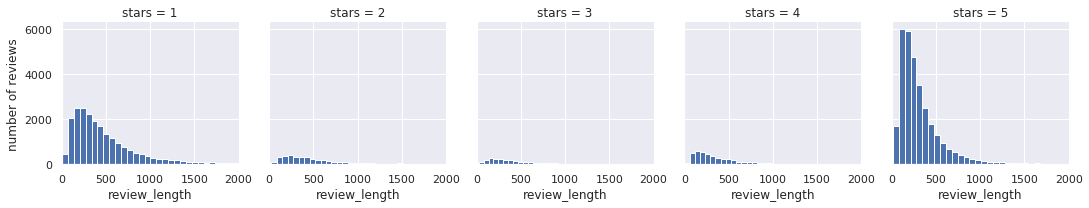

In [14]:
# check how the review lengths are distributed
ax = sns.FacetGrid(data=df, col='stars', xlim=(0, 2000)).map(plt.hist, 'review_length', bins=50)
ax.axes[0][0].set(ylabel='number of reviews');

In [17]:
pos_reviews = df.clean_text[df.stars>3].values
neg_reviews = df.clean_text[df.stars<3].values
print('Postive Reviews:  {:,}'.format(len(pos_reviews)))
print('Negative Reviews:  {:,}'.format(len(neg_reviews)))

Postive Reviews:  35,971
Negative Reviews:  25,749


In [18]:
pos_reviews = df.clean_text[df.stars==5].values
neg_reviews = df.clean_text[df.stars == 1].values
print('Postive Reviews:  {:,}'.format(len(pos_reviews)))
print('Negative Reviews:  {:,}'.format(len(neg_reviews)))

Postive Reviews:  31,726
Negative Reviews:  21,988


In [ ]:
31726+  21988

## Stop words

In [19]:
# additional stopwords
from sklearn.feature_extraction import text 
extra_words = ['ve', 'like', 'got', 'just', 
               'don', 'really', 'said', 'told', 'ok',
               'came', 'went', 'did', 'didn', 'good']
stop_words = text.ENGLISH_STOP_WORDS.union(extra_words)

## Tfidf

In [20]:
%%time
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a vectorizer object to generate term document counts
tfidf_pos = TfidfVectorizer(stop_words=stop_words, min_df=10, max_df=0.5, 
                        ngram_range=(1,1), token_pattern='[a-z][a-z]+')

tfidf_neg = TfidfVectorizer(stop_words=stop_words, min_df=10, max_df=0.5, 
                        ngram_range=(1,1), token_pattern='[a-z][a-z]+')

# Get random subset of reviews
np.random.seed(38)
num_reviews = 20000
random_neg = np.random.choice(neg_reviews, size=num_reviews)
random_pos = np.random.choice(pos_reviews, size=num_reviews)

dicty = {'pizzas':'pizza', 'burgers':'burger', 'ordered':'order',
         'prices':'price', 'topping':'toppings'}
def replace_words(text, dicty):
    '''Returns text with word substitutions made according
       to the passed `dicty` dictionary'''
    for i,j in dicty.items():
        text = text.replace(i,j)
    return text

random_neg = [replace_words(w, dicty) for w in random_neg]
random_pos = [replace_words(w, dicty) for w in random_pos]

# Get the vectors
neg_vectors = tfidf_neg.fit_transform(random_neg)
pos_vectors = tfidf_pos.fit_transform(random_pos)

CPU times: user 2.69 s, sys: 219 ms, total: 2.91 s
Wall time: 2.94 s


In [21]:
# Store TFIDF vectors in a Pandas DataFrame to investigate further
neg_df = pd.DataFrame(neg_vectors.todense(), columns=[tfidf_neg.get_feature_names()])
pos_df = pd.DataFrame(pos_vectors.todense(), columns=[tfidf_pos.get_feature_names()])

# get mean for each column (word): highest means are most important words
col_means_neg = {}
for col in neg_df:
    col_means_neg[col] = neg_df[col].mean()

col_means_pos = {}
for col in pos_df:
    col_means_pos[col] = pos_df[col].mean()

In [23]:
no_top_words = 8

print('Top %d words in POSITIVE reviews:' %no_top_words, end='')
print(sorted(col_means_pos, key=col_means_pos.get, reverse=True)[:no_top_words])

Top 8 words in POSITIVE reviews:[('doctor',), ('staff',), ('care',), ('great',), ('time',), ('office',), ('recommend',), ('feel',)]


In [24]:
print('Top %d words in NEGATIVE reviews:' %no_top_words, end='')
print(sorted(col_means_neg, key=col_means_neg.get, reverse=True)[:no_top_words])

Top 8 words in NEGATIVE reviews:[('doctor',), ('time',), ('wait',), ('appointment',), ('office',), ('tell',), ('dr',), ('say',)]


In [25]:
# delete dataframes to save memory
del neg_df
del pos_df

## LSA

In [26]:
# LSA
from gensim import corpora, models, similarities, matutils

# Convert sparse matrix of counts to a gensim corpus
# Need to transpose it for gensim which wants terms by docs instead of docs by terms
tfidf_pos_corpus = matutils.Sparse2Corpus(pos_vectors.transpose())
tfidf_neg_corpus = matutils.Sparse2Corpus(neg_vectors.transpose())

# Row indices
id2word_pos = dict((v,k) for k,v in tfidf_pos.vocabulary_.items())
id2word_neg = dict((v,k) for k,v in tfidf_neg.vocabulary_.items())

# This is a hack for Python 3!
id2word_pos = corpora.Dictionary.from_corpus(tfidf_pos_corpus, id2word=id2word_pos)
id2word_neg = corpora.Dictionary.from_corpus(tfidf_neg_corpus, id2word=id2word_neg)

In [27]:
# create LSA model
num_topics = 20
lsi_pos = models.LsiModel(tfidf_pos_corpus, id2word=id2word_pos, num_topics=num_topics)
lsi_neg = models.LsiModel(tfidf_neg_corpus, id2word=id2word_neg, num_topics=num_topics)

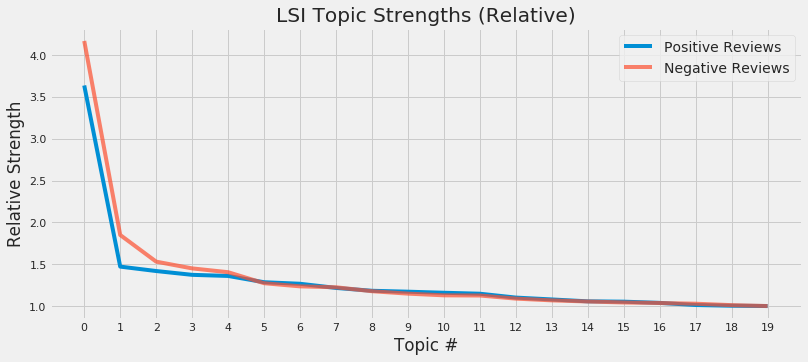

In [28]:
# elbow plot
singular_values_pos = lsi_pos.projection.s.tolist()
singular_values_pos_rel = [sv/singular_values_pos[-1] for sv in singular_values_pos]
singular_values_neg = lsi_neg.projection.s.tolist()
singular_values_neg_rel = [sv/singular_values_neg[-1] for sv in singular_values_neg]

plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,5))
plt.plot(range(len(singular_values_pos)), singular_values_pos_rel, label='Positive Reviews', alpha=1.0)
plt.plot(range(len(singular_values_neg)), singular_values_neg_rel, label='Negative Reviews', alpha=0.7)
plt.xticks(range(len(singular_values_pos)), range(len(singular_values_pos)))
plt.xlabel('Topic #')
plt.ylabel('Relative Strength')
plt.title('LSI Topic Strengths (Relative)')
plt.legend(loc=0, fontsize='medium');

In [29]:
topics_to_print = 5

In [30]:
# look at top positive topics
print('Top %d topics for POSITIVE reviews' %(topics_to_print))
print('-'*33)
pprint(lsi_pos.show_topics()[0:topics_to_print])

Top 5 topics for POSITIVE reviews
---------------------------------
[(0,
  '0.238*"doctor" + 0.213*"staff" + 0.205*"time" + 0.202*"care" + '
  '0.194*"great" + 0.193*"office" + 0.154*"feel" + 0.153*"recommend" + '
  '0.152*"make" + 0.144*"friendly"'),
 (1,
  '0.321*"friendly" + -0.244*"surgery" + -0.238*"pain" + 0.235*"staff" + '
  '0.228*"great" + 0.181*"place" + 0.169*"clean" + 0.158*"nice" + '
  '-0.143*"make" + -0.142*"feel"'),
 (2,
  '0.365*"doctor" + 0.299*"wait" + -0.250*"surgery" + -0.249*"recommend" + '
  '-0.242*"great" + -0.239*"highly" + 0.214*"time" + -0.188*"staff" + '
  '-0.150*"eye" + -0.132*"professional"'),
 (3,
  '0.440*"care" + 0.283*"doctor" + -0.234*"wait" + 0.207*"patient" + '
  '0.196*"highly" + -0.184*"nice" + 0.179*"recommend" + -0.172*"make" + '
  '-0.165*"appointment" + 0.151*"family"'),
 (4,
  '0.413*"care" + -0.344*"office" + 0.304*"urgent" + -0.245*"doctor" + '
  '-0.195*"question" + -0.175*"answer" + -0.153*"feel" + 0.146*"place" + '
  '0.141*"service" +

In [31]:
# look at top negative topics
print('Top %d topics for NEGATIVE reviews' %(topics_to_print))
print('-'*33)
pprint(lsi_neg.show_topics()[0:topics_to_print])

Top 5 topics for NEGATIVE reviews
---------------------------------
[(0,
  '0.224*"doctor" + 0.208*"appointment" + 0.208*"wait" + 0.203*"time" + '
  '0.195*"office" + 0.184*"tell" + 0.168*"say" + 0.166*"dr" + 0.144*"hour" + '
  '0.138*"patient"'),
 (1,
  '0.532*"wait" + 0.367*"hour" + 0.269*"appointment" + 0.209*"minute" + '
  '-0.196*"insurance" + 0.181*"time" + 0.163*"room" + -0.143*"pay" + '
  '-0.131*"dr" + -0.122*"office"'),
 (2,
  '-0.543*"appointment" + -0.286*"office" + 0.208*"pain" + 0.185*"room" + '
  '0.183*"hospital" + 0.178*"nurse" + -0.168*"schedule" + -0.159*"insurance" + '
  '0.154*"care" + 0.137*"come"'),
 (3,
  '0.413*"insurance" + -0.341*"office" + -0.294*"staff" + 0.286*"pay" + '
  '-0.265*"dr" + -0.204*"rude" + -0.198*"doctor" + 0.180*"tell" + '
  '-0.167*"patient" + 0.150*"charge"'),
 (4,
  '0.273*"staff" + 0.261*"service" + 0.261*"insurance" + -0.232*"appointment" '
  '+ -0.223*"dr" + 0.219*"rude" + 0.198*"place" + -0.185*"say" + -0.178*"tell" '
  '+ 0.171*"custo

## nmf

In [32]:
%%time
# negative values in LSA topics are annoying
# let's see if we can fix that with NMF
from sklearn.decomposition import NMF

# change num_topics
num_topics = 6

nmf_pos = NMF(n_components=num_topics)
W_pos = nmf_pos.fit_transform(pos_vectors)
H_pos = nmf_pos.components_

nmf_neg = NMF(n_components=num_topics)
W_neg = nmf_neg.fit_transform(neg_vectors)
H_neg = nmf_neg.components_

CPU times: user 11.6 s, sys: 938 ms, total: 12.5 s
Wall time: 5.84 s


In [33]:
def display_topics(model, feature_names, num_topics, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        if topic_idx < num_topics:
            print("{:11}".format("Topic %d:" %(topic_idx)), end='')
            print(", ".join(['{:04.3f}*'.format(topic[i])+feature_names[i] \
                             for i in topic.argsort()[:-no_top_words-1:-1]]))

no_topics = num_topics
no_top_words = 6

print('Top topics + words for POSITIVE reviews')
print('-'*39)
display_topics(nmf_pos, tfidf_pos.get_feature_names(), no_topics, no_top_words)

print('\nTop topics + words for NEGATIVE reviews')
print('-'*39)
display_topics(nmf_neg, tfidf_neg.get_feature_names(), no_topics, no_top_words)

Top topics + words for POSITIVE reviews
---------------------------------------
Topic 0:   2.178*wait, 1.426*time, 1.028*appointment, 0.942*minute, 0.884*nice, 0.875*room
Topic 1:   1.527*great, 1.262*staff, 1.101*recommend, 1.058*friendly, 0.977*highly, 0.773*place
Topic 2:   1.259*surgery, 1.131*pain, 0.696*help, 0.630*eye, 0.613*year, 0.593*work
Topic 3:   2.887*doctor, 1.176*office, 0.652*year, 0.589*patient, 0.424*family, 0.390*love
Topic 4:   2.829*care, 1.058*urgent, 0.682*patient, 0.392*excellent, 0.359*need, 0.358*medical
Topic 5:   1.829*feel, 1.731*make, 0.980*comfortable, 0.962*question, 0.817*answer, 0.582*time

Top topics + words for NEGATIVE reviews
---------------------------------------
Topic 0:   1.417*say, 1.295*tell, 1.106*doctor, 0.994*pain, 0.965*ask, 0.923*come
Topic 1:   2.541*wait, 1.773*hour, 0.913*time, 0.882*room, 0.856*minute, 0.554*come
Topic 2:   3.029*appointment, 0.911*schedule, 0.799*make, 0.646*time, 0.539*tell, 0.510*minute
Topic 3:   1.938*insurance

## Review Similarity on NMF space

In [34]:
# look at a random positive review
review_num = np.random.randint(0, high=len(random_pos))
print(review_num)
print(random_pos[review_num])

19384
go dr mark year excellent internist take time patient supportive sometimes bit wait ok take necessary time patient sometimes need extra time sometimes someone else need get pharmacologist also know drug keep track anything new good highly recommend


In [35]:
# compute cosine similarities of this review with all other reviews in the new space
import sklearn.metrics.pairwise as smp

cosines = {}
for ind, review in enumerate(W_pos):
    similarity = smp.cosine_similarity(W_pos[review_num].reshape(1,-1), review.reshape(1,-1))
    cosines[ind] = similarity[0][0]

In [36]:
# get top 3 matching reviews
for n in sorted(cosines, key=cosines.get, reverse=True)[1:4]:
    print('-'*50)
    print('>> Similarity {:.3f}'.format(cosines[n]))
    print(random_pos[n])
print('-'*50)

--------------------------------------------------
>> Similarity 0.992
always enjoy doctor siena pediatric dr carrie first sweet end switch dr glasser call daughter bear diagnose hip dysplasia get us immediate appointment specialist even leave hospital unfortunately dr glasser no longer siena stay start see dr mehri also sweet short wait time important kid office clean nice support staff talk someone question see review people complain not get day sick appointment try accommodate sure would help squeeze next day child sick need immediate attention not wait next day hospital urgent care would next good option pediatrician not find place great siena pediatric love
--------------------------------------------------
>> Similarity 0.985
kid go see dr salek since day maybe amazing still know kid day even though see one son always ask seem genuinely concerned kid say wait office quick get quick would recommend dr salek take care friend kiddo
--------------------------------------------------


## Count vectorizer

In [37]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a vectorizer object to generate term document counts
cv_pos = CountVectorizer(stop_words=stop_words, min_df=10, max_df=0.5, 
                        ngram_range=(1,1), token_pattern='[a-z][a-z]+')

cv_neg = CountVectorizer(stop_words=stop_words, min_df=10, max_df=0.5, 
                        ngram_range=(1,1), token_pattern='[a-z][a-z]+')

# Get random subset of reviews
np.random.seed(38)
num_reviews = 15000
cv_random_neg = np.random.choice(neg_reviews, size=num_reviews)
cv_random_pos = np.random.choice(pos_reviews, size=num_reviews)

# replace words from defined dictionary 'dicty'
cv_random_neg = [replace_words(w, dicty) for w in cv_random_neg]
cv_random_pos = [replace_words(w, dicty) for w in cv_random_pos]

# Get the cv vectors
cv_neg_vectors = cv_neg.fit_transform(cv_random_neg).transpose()
cv_pos_vectors = cv_pos.fit_transform(cv_random_pos).transpose()


In [38]:
# Convert sparse matrix of counts to a gensim corpus
corpus_neg = matutils.Sparse2Corpus(cv_neg_vectors)
corpus_pos = matutils.Sparse2Corpus(cv_pos_vectors)

# save a mapping (dict) of row id to word (token) for later use by gensim 
id2word_cv_pos = dict((v, k) for k, v in cv_pos.vocabulary_.items())
id2word_cv_neg = dict((v, k) for k, v in cv_neg.vocabulary_.items())

## lda
~ 2 minutes

In [39]:
%%time
# create lda multicore model
lda_pos = models.ldamulticore.LdaMulticore(corpus=corpus_pos, num_topics=5, 
                                           id2word=id2word_cv_pos, passes=10, workers=15)
lda_neg = models.ldamulticore.LdaMulticore(corpus=corpus_neg, num_topics=5, 
                                           id2word=id2word_cv_neg, passes=10, workers=15)

CPU times: user 3min 41s, sys: 31.5 s, total: 4min 12s
Wall time: 4min 4s


In [40]:
print('Top topics + words for POSITIVE reviews')
print('-'*39)
pprint(lda_pos.print_topics(num_words=7))

print('\nTop topics + words for NEGATIVE reviews')
print('-'*39)
pprint(lda_neg.print_topics(num_words=7))

Top topics + words for POSITIVE reviews
---------------------------------------
[(0,
  '0.014*"pain" + 0.014*"year" + 0.011*"surgery" + 0.010*"help" + 0.009*"care" '
  '+ 0.009*"thank" + 0.009*"doctor"'),
 (1,
  '0.018*"time" + 0.013*"wait" + 0.011*"care" + 0.011*"great" + 0.010*"need" + '
  '0.010*"doctor" + 0.009*"come"'),
 (2,
  '0.035*"doctor" + 0.032*"care" + 0.025*"staff" + 0.019*"time" + '
  '0.018*"great" + 0.014*"recommend" + 0.014*"office"'),
 (3,
  '0.028*"staff" + 0.025*"office" + 0.015*"great" + 0.014*"recommend" + '
  '0.013*"surgery" + 0.012*"friendly" + 0.012*"love"'),
 (4,
  '0.022*"make" + 0.019*"doctor" + 0.018*"time" + 0.016*"feel" + '
  '0.014*"question" + 0.011*"office" + 0.011*"staff"')]

Top topics + words for NEGATIVE reviews
---------------------------------------
[(0,
  '0.013*"tell" + 0.013*"say" + 0.013*"day" + 0.012*"time" + 0.011*"insurance" '
  '+ 0.010*"office" + 0.010*"doctor"'),
 (1,
  '0.021*"tell" + 0.021*"say" + 0.014*"pain" + 0.014*"doctor" + 0.01

## Continuing with NMF Topics ¶ 

In [41]:
# let's remind ourselves of the POSITIVE topics
print('Top topics + words for POSITIVE reviews')
print('-'*39)
display_topics(nmf_pos, tfidf_pos.get_feature_names(), no_topics, no_top_words)

Top topics + words for POSITIVE reviews
---------------------------------------
Topic 0:   2.178*wait, 1.426*time, 1.028*appointment, 0.942*minute, 0.884*nice, 0.875*room
Topic 1:   1.527*great, 1.262*staff, 1.101*recommend, 1.058*friendly, 0.977*highly, 0.773*place
Topic 2:   1.259*surgery, 1.131*pain, 0.696*help, 0.630*eye, 0.613*year, 0.593*work
Topic 3:   2.887*doctor, 1.176*office, 0.652*year, 0.589*patient, 0.424*family, 0.390*love
Topic 4:   2.829*care, 1.058*urgent, 0.682*patient, 0.392*excellent, 0.359*need, 0.358*medical
Topic 5:   1.829*feel, 1.731*make, 0.980*comfortable, 0.962*question, 0.817*answer, 0.582*time


In [42]:
# we can investigate a random positive review and see how it's distributed across those topics
review_num = np.random.randint(0, high=len(random_pos))
print('Positive Review #%d' %review_num)
print('-'*25)
print(random_pos[review_num])
print('-'*25)
topic_dict = {}
for ind, w in enumerate(W_pos[review_num]):
    topic_dict[ind] = w
for k in sorted(topic_dict, key=topic_dict.get, reverse=True):
     print('Topic {}: {:.4f}'.format(k, topic_dict[k]))

Positive Review #3533
-------------------------
tech nice loud even ear plug unbearable actually try dance sound first min annoying loud start question ability hear afterward
-------------------------
Topic 0: 0.0110
Topic 5: 0.0105
Topic 2: 0.0059
Topic 1: 0.0000
Topic 3: 0.0000
Topic 4: 0.0000


In [43]:
print('Top topics + words for NEGATIVE reviews')
print('-'*39)
display_topics(nmf_neg, tfidf_neg.get_feature_names(), no_topics, no_top_words)

Top topics + words for NEGATIVE reviews
---------------------------------------
Topic 0:   1.417*say, 1.295*tell, 1.106*doctor, 0.994*pain, 0.965*ask, 0.923*come
Topic 1:   2.541*wait, 1.773*hour, 0.913*time, 0.882*room, 0.856*minute, 0.554*come
Topic 2:   3.029*appointment, 0.911*schedule, 0.799*make, 0.646*time, 0.539*tell, 0.510*minute
Topic 3:   1.938*insurance, 1.366*pay, 0.746*charge, 0.654*company, 0.602*billing, 0.469*visit
Topic 4:   1.929*office, 1.532*staff, 1.239*doctor, 1.146*rude, 0.769*patient, 0.603*bad
Topic 5:   3.293*dr, 0.641*surgery, 0.578*patient, 0.521*year, 0.479*appt, 0.409*office


In [44]:
# now investigate a random negative review and see how it's distributed across those topics
review_num = np.random.randint(0, high=len(random_neg))
print('Negative Review #%d' %review_num)
print('-'*25)
print(random_neg[review_num])
print('-'*25)
topic_dict = {}
for ind, w in enumerate(W_neg[review_num]):
    topic_dict[ind] = w
for k in sorted(topic_dict, key=topic_dict.get, reverse=True):
     print('Topic {}: {:.4f}'.format(k, topic_dict[k]))

Negative Review #3591
-------------------------
bad experience ever hour not busy still not see doctor never ever come recommend place anyone seem appearance mean place patient would let give zero star would
-------------------------
Topic 4: 0.0423
Topic 1: 0.0419
Topic 0: 0.0155
Topic 2: 0.0000
Topic 3: 0.0000
Topic 5: 0.0000


## Topic Modeling All Reviews  

At this point, we can see that our topics are relatively interpretable and match along with the reviews they're trying to categorize. Let's proceed with topic modeling all reviews and businesses using NMF.


In [45]:
print('Postive Reviews:  {:,}'.format(len(pos_reviews)))
print('Negative Reviews:  {:,}'.format(len(neg_reviews)))

Postive Reviews:  31,726
Negative Reviews:  21,988


In [46]:
%%time
# Create a vectorizer object to generate term document counts
tfidf_pos = TfidfVectorizer(stop_words=stop_words, min_df=10, max_df=0.5, 
                        ngram_range=(1,1), token_pattern='[a-z][a-z]+')

tfidf_neg = TfidfVectorizer(stop_words=stop_words, min_df=10, max_df=0.5, 
                        ngram_range=(1,1), token_pattern='[a-z][a-z]+')

# replace words with defined dictionary 'dicty'
pos_reviews = [replace_words(w, dicty) for w in pos_reviews]
neg_reviews = [replace_words(w, dicty) for w in neg_reviews]

# Get the vectors
neg_vectors = tfidf_neg.fit_transform(neg_reviews)
pos_vectors = tfidf_pos.fit_transform(pos_reviews)

CPU times: user 3.27 s, sys: 62.5 ms, total: 3.33 s
Wall time: 3.32 s


In [47]:
%%time
# NMF for all reviews
from sklearn.decomposition import NMF

# change num_topics
num_topics = 6

nmf_pos = NMF(n_components=num_topics)
W_pos = nmf_pos.fit_transform(pos_vectors)
H_pos = nmf_pos.components_

nmf_neg = NMF(n_components=num_topics)
W_neg = nmf_neg.fit_transform(neg_vectors)
H_neg = nmf_neg.components_

CPU times: user 11.9 s, sys: 1.25 s, total: 13.2 s
Wall time: 6.07 s


In [48]:
no_topics = num_topics
no_top_words = 6

print('Topics for POSITIVE reviews')
print('-'*39)
display_topics(nmf_pos, tfidf_pos.get_feature_names(), no_topics, no_top_words)

print('\nTopics for NEGATIVE reviews')
print('-'*39)
display_topics(nmf_neg, tfidf_neg.get_feature_names(), no_topics, no_top_words)


Topics for POSITIVE reviews
---------------------------------------
Topic 0:   3.474*doctor, 1.713*office, 0.903*year, 0.840*patient, 0.779*love, 0.548*listen
Topic 1:   1.332*surgery, 1.144*pain, 0.722*eye, 0.635*help, 0.576*year, 0.542*work
Topic 2:   1.872*great, 1.528*staff, 1.351*friendly, 1.147*recommend, 0.977*place, 0.938*highly
Topic 3:   2.738*care, 1.082*urgent, 0.655*patient, 0.423*need, 0.407*medical, 0.352*excellent
Topic 4:   2.008*wait, 1.514*time, 0.991*appointment, 0.934*minute, 0.808*room, 0.798*long
Topic 5:   2.143*feel, 2.128*make, 1.228*comfortable, 0.947*question, 0.770*answer, 0.629*sure

Topics for NEGATIVE reviews
---------------------------------------
Topic 0:   1.516*say, 1.339*tell, 1.087*doctor, 1.067*pain, 0.979*ask, 0.952*come
Topic 1:   2.622*wait, 1.862*hour, 0.989*room, 0.979*time, 0.883*minute, 0.562*come
Topic 2:   3.052*appointment, 0.945*schedule, 0.852*make, 0.591*time, 0.524*tell, 0.507*minute
Topic 3:   2.009*insurance, 1.421*pay, 0.737*charg

```

Topics for POSITIVE reviews
---------------------------------------
Topic 0:   3.474*doctor, 1.713*office, 0.903*year, 0.840*patient, 0.779*love, 0.548*listen
Topic 1:   1.332*surgery, 1.144*pain, 0.722*eye, 0.635*help, 0.576*year, 0.542*work
Topic 2:   1.872*great, 1.528*staff, 1.351*friendly, 1.147*recommend, 0.977*place, 0.938*highly
Topic 3:   2.738*care, 1.082*urgent, 0.655*patient, 0.423*need, 0.407*medical, 0.352*excellent
Topic 4:   2.008*wait, 1.514*time, 0.991*appointment, 0.934*minute, 0.808*room, 0.798*long
Topic 5:   2.143*feel, 2.128*make, 1.228*comfortable, 0.947*question, 0.770*answer, 0.629*sure

Topics for NEGATIVE reviews
---------------------------------------
Topic 0:   1.516*say, 1.339*tell, 1.087*doctor, 1.067*pain, 0.979*ask, 0.952*come
Topic 1:   2.622*wait, 1.862*hour, 0.989*room, 0.979*time, 0.883*minute, 0.562*come
Topic 2:   3.052*appointment, 0.945*schedule, 0.852*make, 0.591*time, 0.524*tell, 0.507*minute
Topic 3:   2.009*insurance, 1.421*pay, 0.737*charge, 0.632*company, 0.596*billing, 0.483*visit
Topic 4:   1.420*place, 1.315*rude, 1.239*service, 1.016*bad, 0.999*staff, 0.988*care
Topic 5:   2.990*office, 1.898*dr, 1.095*doctor, 1.026*staff, 1.022*patient, 0.554*new
    ```

## Adding Topic Weights to Pandas DataFrame ¶ 

In [49]:

# create topic dictionaries to summarize the topic meanings
pos_topics = {0:'doctor_office_year_patient_love_listen', 1:'surgery_pain_eye_help_year_work', 2:'great_staff_friendly_recommended_place_highly', 
              3:'care_urgent_patient_need_medical_excellent', 4:'wait_time_appointment_minure_room_long', 5:'feel_make_comfortable_question_answer_sure'}

neg_topics = {0:'say_tell_doctor_pain_ask_come', 1:'wait_hour_room_time_minute_come', 2:'appointment_schedule_make_time_tell_minute', 
              3:'insurance_pay_charge_company_billing_visit', 4:'place_rude_service_bad_staff_care', 5:'office_dr_doctor_staff_patient_new'}

In [ ]:
## good data but not bussness_id


# # create topic dictionaries to summarize the topic meanings
# pos_topics = {0:'best_doctor_love', 1:'time_wait_appointment', 2:'friendly_staff', 
#               3:'surgery_pain_results', 4:'urgent_care_excellent', 5:'great_place_service'}

# neg_topics = {0:'appointment_time_make', 1:'wait_wait_hour', 2:'doctor_care_pain_nurse', 
#               3:'insurace_pay_billing', 4:'office_staff_rude', 5:'dr_surgery_appt'}




# # create topic dictionaries to summarize the topic meanings
# pos_topics = {0:'time_wait_appointment', 1:'friendly_staff', 2:'urgent_care_excellent', 
#               3:'surgery_pain_therapy', 4:'best_doctor_years', 5:'great_place_service'}

# neg_topics = {0:'appointment_time_make', 1:'wait_wait_hour', 2:'doctor_care_pain_nurse', 
#               3:'insurace_pay_billing', 4:'office_staff_rude', 5:'dr_surgery_appt'}

In [ ]:
df.head()

In [50]:
# we create dataframes for positive & negative reviews that we can
# later add topic information to
df_pos = df[['business_id','name','stars', 'clean_text', 'review_length']][df.stars == 5].reset_index()
df_neg = df[['business_id','name','stars', 'clean_text', 'review_length']][df.stars == 1].reset_index()
df_pos.drop(labels='index', axis=1, inplace=True)
df_neg.drop(labels='index', axis=1, inplace=True)

Our topic weights are not immediately relevant as absolute numbers. Let's take a look.


In [51]:
print('Topic weights : ', W_pos[0])
print('Sum of weights: ', W_pos[0].sum())

Topic weights :  [0.01050616 0.0845691  0.         0.01997233 0.00072664 0.0055351 ]
Sum of weights:  0.1213093240283373


## normalize

-needed??

In [52]:
from sklearn.preprocessing import normalize
print('Normalized Topic weights : ', normalize(W_pos[0].reshape(1,-1), norm='l1'))
print('Sum of normalized weights: ', normalize(W_pos[0].reshape(1,-1), norm='l1').sum())

Normalized Topic weights :  [[0.08660633 0.69713599 0.         0.1646397  0.00598997 0.045628  ]]
Sum of normalized weights:  1.0


In [53]:
# add normalized topic weights to each review
df_pos = pd.concat([df_pos, pd.DataFrame(normalize(W_pos, norm='l1'))], axis=1)
df_neg = pd.concat([df_neg, pd.DataFrame(normalize(W_neg, norm='l1'))], axis=1)

In [54]:
# peek into a dataframe to ensure it worked right
df_neg.head()

,business_id,name,stars,clean_text,review_length,0,1,2,3,4,5
0,y-4xTZNKVm8mAZpiXMS5ZA,"Lauren Byrne, MD",1,please stay away place bad care imaginable sta...,998,0.441146,0.000000,0.181287,0.054387,0.217956,0.105224
1,y-4xTZNKVm8mAZpiXMS5ZA,"Lauren Byrne, MD",1,wish could give star bad office ever horrible ...,896,0.000000,0.020387,0.223580,0.224865,0.178816,0.352351
2,y-4xTZNKVm8mAZpiXMS5ZA,"Lauren Byrne, MD",1,go emergency room kidney stone attack emergenc...,1610,0.334025,0.129313,0.382593,0.000000,0.000000,0.154068
3,y-4xTZNKVm8mAZpiXMS5ZA,"Lauren Byrne, MD",1,bad place ever dr bryne reschedule first appt ...,504,0.319899,0.000000,0.070051,0.363266,0.055095,0.191689
4,y-4xTZNKVm8mAZpiXMS5ZA,"Lauren Byrne, MD",1,update last review situation get even bad urin...,272,0.694811,0.000000,0.010756,0.000000,0.294433,0.000000


In [56]:





# group by business_id and apply mean/count functions to columns
df_pos_bsns = df_pos.groupby(['business_id','name']).agg({'stars':'mean', 'clean_text':'count',
                                                 'review_length':'mean',0:'mean', 
                                                 1:'mean', 2:'mean', 3:'mean',
                                                 4:'mean', 5:'mean'}).reset_index()
df_neg_bsns = df_neg.groupby(['business_id','name']).agg({'stars':'mean', 'clean_text':'count',
                                                 'review_length':'mean',0:'mean', 
                                                 1:'mean', 2:'mean', 3:'mean',
                                                 4:'mean', 5:'mean'}).reset_index()



# # group by business_id and apply mean/count functions to columns
# df_pos_bsns = df_pos.groupby('business_id').agg({'stars':'mean', 'text':'count',
#                                                  'review_length':'mean',0:'mean', 
#                                                  1:'mean', 2:'mean', 3:'mean',
#                                                  4:'mean', 5:'mean'}).reset_index()
# df_neg_bsns = df_neg.groupby('business_id').agg({'stars':'mean', 'text':'count',
#                                                  'review_length':'mean',0:'mean', 
#                                                  1:'mean', 2:'mean', 3:'mean',
#                                                  4:'mean', 5:'mean'}).reset_index()


In [57]:
df_pos_bsns.head()

,business_id,name,stars,clean_text,review_length,0,1,2,3,4,5
0,--8LPVSo5i0Oo61X01sV9A,Valley Bone and Joint Specialists,5,2,189.000000,0.247598,0.530368,0.222034,0.000000,0.000000,0.000000
1,-1hxrB7R9wOYC1djw8l7dg,"Stacey L. Norris, DMD - Main Street Dentistry",5,3,330.333333,0.031628,0.305794,0.233131,0.046098,0.255777,0.127572
2,-1z-cvNWGM66kKTVNHK9Ww,Foothills Sports Medicine Physical Therapy,5,10,482.700000,0.052442,0.404831,0.272453,0.076186,0.065868,0.128220
3,-2UWYfzeK65e6naWSEUz7g,Alliance Urgent Care,5,2,188.500000,0.000000,0.328082,0.001857,0.413386,0.214227,0.042448
4,-3ediinjso_7dsWsxmXbXA,Desert Center For Allergy and Chest Diseases G...,5,2,690.500000,0.237738,0.139973,0.250872,0.014455,0.293519,0.063444


In [58]:
df_pos_bsns.head(10)

,business_id,name,stars,clean_text,review_length,0,1,2,3,4,5
0,--8LPVSo5i0Oo61X01sV9A,Valley Bone and Joint Specialists,5,2,189.000000,0.247598,0.530368,0.222034,0.000000,0.000000,0.000000
1,-1hxrB7R9wOYC1djw8l7dg,"Stacey L. Norris, DMD - Main Street Dentistry",5,3,330.333333,0.031628,0.305794,0.233131,0.046098,0.255777,0.127572
2,-1z-cvNWGM66kKTVNHK9Ww,Foothills Sports Medicine Physical Therapy,5,10,482.700000,0.052442,0.404831,0.272453,0.076186,0.065868,0.128220
3,-2UWYfzeK65e6naWSEUz7g,Alliance Urgent Care,5,2,188.500000,0.000000,0.328082,0.001857,0.413386,0.214227,0.042448
4,-3ediinjso_7dsWsxmXbXA,Desert Center For Allergy and Chest Diseases G...,5,2,690.500000,0.237738,0.139973,0.250872,0.014455,0.293519,0.063444
5,-5__awbuGMHAk6cZgJEgLQ,LensCrafters,5,26,225.846154,0.066780,0.304313,0.348889,0.053802,0.128819,0.097397
6,-74zTQjLpOTzgvPTsN2Z8A,WellHealth Women's Specialty Care,5,9,235.111111,0.180201,0.023094,0.214976,0.231149,0.214961,0.135619
7,-7q9m5IByOBdFUZe0qXY2Q,Dignity Health AZ General Hospital Emergency R...,5,7,435.142857,0.124705,0.134657,0.211644,0.200820,0.291158,0.037016
8,-Ag8JiHlShYxx0KBHZfXVw,Harb Mouchir S MD,5,1,480.000000,0.144505,0.339854,0.009614,0.010421,0.273601,0.222006
9,-Ao1dnI263daxMEBDS2xiQ,Retina Associates of Cleveland,5,3,296.333333,0.070276,0.400146,0.278057,0.148276,0.041409,0.061835


In [59]:
scores = df_pos_bsns[df_pos_bsns.business_id == '-3ediinjso_7dsWsxmXbXA'].iloc[:,-6:].values
print(df[df.business_id == '-3ediinjso_7dsWsxmXbXA']['name'].values[0] + ' - Positive Reviews')
print('-'*36)
for n in pos_topics:
    print('Topic {}: {:18} > {:.4f}'.format(n, pos_topics[n], scores[0][n]))

Desert Center For Allergy and Chest Diseases Group - Positive Reviews
------------------------------------
Topic 0: doctor_office_year_patient_love_listen > 0.2377
Topic 1: surgery_pain_eye_help_year_work > 0.1400
Topic 2: great_staff_friendly_recommended_place_highly > 0.2509
Topic 3: care_urgent_patient_need_medical_excellent > 0.0145
Topic 4: wait_time_appointment_minure_room_long > 0.2935
Topic 5: feel_make_comfortable_question_answer_sure > 0.0634


In [ ]:
scores[0][0]

In [ ]:
%%time
# write to CSV
df_pos_bsns.to_csv('pos_bsns.csv')
df_neg_bsns.to_csv('neg_bsns.csv')
df_pos.to_csv('pos_reviews.csv')
df_neg.to_csv('neg_reviews.csv')

In [ ]:
df_pos

In [ ]:
df_pos_bsns

In [ ]:
df_neg_bsns.head(10)

In [ ]:
scores = df_neg_bsns[df_neg_bsns.business_id == '-7q9m5IByOBdFUZe0qXY2Q'].iloc[:,-6:].values
print(df[df.business_id == '-7q9m5IByOBdFUZe0qXY2Q']['name'].values[0] + ' - Negative Reviews')
print('-'*36)
for n in pos_topics:
    print('Topic {}: {:18} > {:.4f}'.format(n, neg_topics[n], scores[0][n]))

In [ ]:
df[df.business_id == '-7q9m5IByOBdFUZe0qXY2Q'].stars.mean()

In [ ]:
df[df.business_id == '-7q9m5IByOBdFUZe0qXY2Q'].stars.value_counts()

In [ ]:
bad_b = df[df.business_id == '-7q9m5IByOBdFUZe0qXY2Q']

In [ ]:
bad_b.text[52892]

In [ ]:
bad_b.text

In [ ]:
bad_b.text[52893]